In [108]:
import pandas as pd

# 读取 CSV 文件，假设文件名为 "data.csv"
df = pd.read_excel(r'C:\NINGLIK\school\数据可视化\上海市餐饮行业.xlsx')

# 查看数据框的前几行，检查数据格式
print(df.head())




    口味   环境   服务  人均消费  行政区  食品类别
0  150  150  150   150  150   150
1  144  144  144   144  144   144
2  162  162  162   162  162   162
3  129  129  129   129  129   129
4  143  143  143   143  143   143


In [109]:
# 查看数据框的描述信息，包括统计描述和数据类型
print(df.describe())
print('/')
print(df.info())

               口味          环境          服务        人均消费         行政区        食品类别
count   20.000000   20.000000   20.000000   20.000000   20.000000   20.000000
mean   147.400000  147.400000  147.400000  147.400000  147.400000  147.400000
std     13.781758   13.781758   13.781758   13.781758   13.781758   13.781758
min    123.000000  123.000000  123.000000  123.000000  123.000000  123.000000
25%    142.000000  142.000000  142.000000  142.000000  142.000000  142.000000
50%    147.500000  147.500000  147.500000  147.500000  147.500000  147.500000
75%    156.500000  156.500000  156.500000  156.500000  156.500000  156.500000
max    175.000000  175.000000  175.000000  175.000000  175.000000  175.000000
/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   口味      20 non-null     int64
 1   环境      20 non-null     int64
 2   服务      20 non-null     int64
 3   人均消费    20 non

In [110]:
# 删除全为空值的特征列
df.dropna(axis=1, how='all', inplace=True)

# 检查记录中是否存在缺失值，并显示缺失值的总数
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Series([], dtype: int64)


In [111]:
# 删除包含缺失值的记录
df.dropna(inplace=True)

# 检查数据框中是否存在无意义的重复值并删除
df.drop_duplicates(inplace=True)

# 再次查看数据框的描述信息，确保数据清理后的结果
print(df.describe())
print('/')
print(df.info())

               口味          环境          服务        人均消费         行政区        食品类别
count   19.000000   19.000000   19.000000   19.000000   19.000000   19.000000
mean   147.421053  147.421053  147.421053  147.421053  147.421053  147.421053
std     14.159079   14.159079   14.159079   14.159079   14.159079   14.159079
min    123.000000  123.000000  123.000000  123.000000  123.000000  123.000000
25%    141.000000  141.000000  141.000000  141.000000  141.000000  141.000000
50%    148.000000  148.000000  148.000000  148.000000  148.000000  148.000000
75%    157.000000  157.000000  157.000000  157.000000  157.000000  157.000000
max    175.000000  175.000000  175.000000  175.000000  175.000000  175.000000
/
<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   口味      19 non-null     int64
 1   环境      19 non-null     int64
 2   服务      19 non-null     int64
 3   人均消费    19 non-null

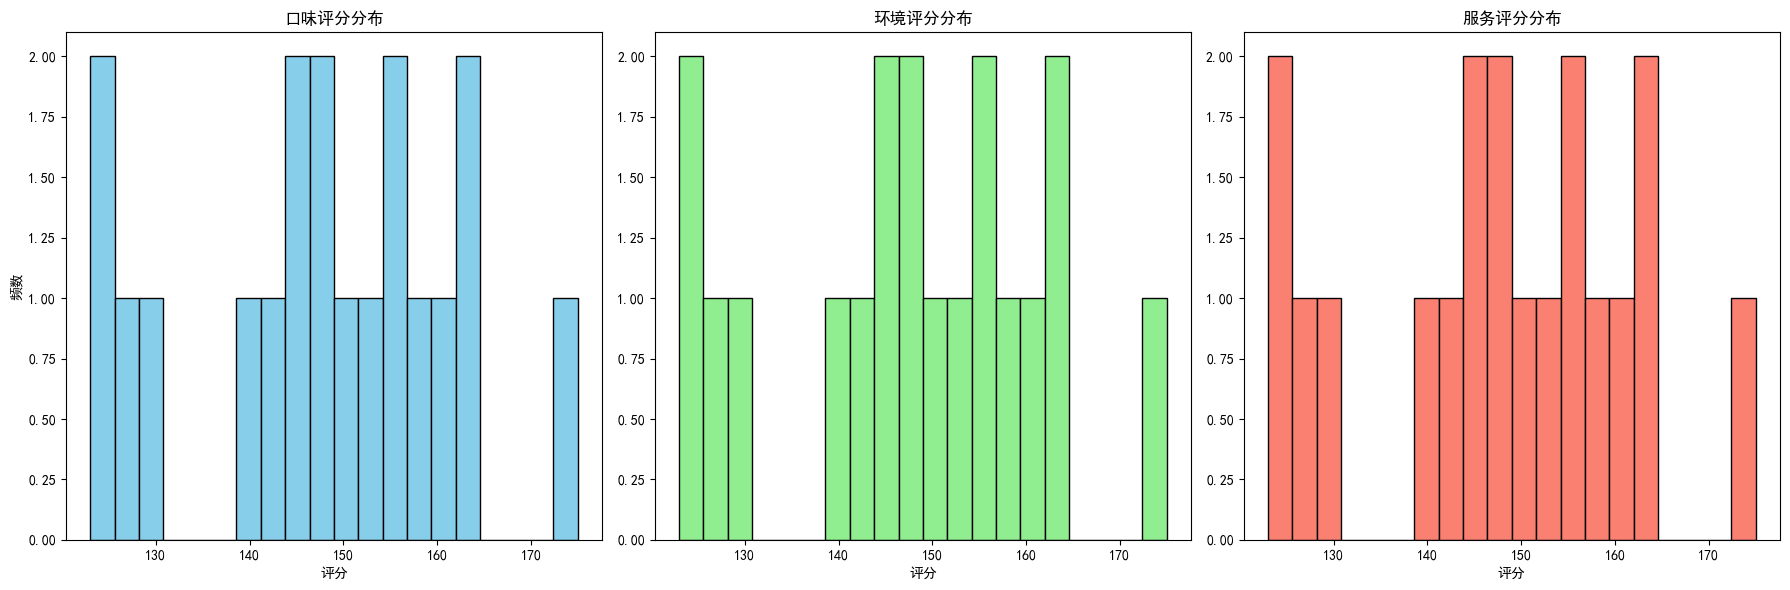

In [112]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
# 绘制“口味”、“环境”、“服务”评分字段的直方图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 口味评分直方图
axes[0].hist(df['口味'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('口味评分分布')
axes[0].set_xlabel('评分')
axes[0].set_ylabel('频数')

# 环境评分直方图
axes[1].hist(df['环境'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('环境评分分布')
axes[1].set_xlabel('评分')

# 服务评分直方图
axes[2].hist(df['服务'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('服务评分分布')
axes[2].set_xlabel('评分')

plt.tight_layout()
plt.show()


In [113]:
from pyecharts.charts import Scatter, Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType
df = pd.read_excel(r'C:\NINGLIK\school\数据可视化\上海市餐饮行业.xlsx')
# 数据准备：将 pandas Series 转换为列表
taste = df['口味'].tolist()
environment = df['环境'].tolist()
service = df['服务'].tolist()
avg_cost = df['人均消费'].tolist()
print(taste)
print(type(taste))
# 散点图
scatter = (
    Scatter(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(avg_cost)
    .add_yaxis("口味", taste)
    .add_yaxis("环境", environment)
    .add_yaxis("服务", service)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评分与人均消费的关系 - 散点图"),
        xaxis_opts=opts.AxisOpts(name="人均消费"),
        yaxis_opts=opts.AxisOpts(name="评分"),
    )
)

# 渲染散点图
scatter.render_notebook()


[150, 144, 162, 129, 143, 152, 175, 160, 148, 125, 155, 123, 147, 139, 145, 158, 163, 156, 127, 147]
<class 'list'>


In [114]:
# 折线图
line = (
    Line(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(avg_cost)
    .add_yaxis("口味", taste, is_smooth=True)
    .add_yaxis("环境", environment, is_smooth=True)
    .add_yaxis("服务", service, is_smooth=True)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评分与人均消费的关系 - 折线图"),
        xaxis_opts=opts.AxisOpts(name="人均消费"),
        yaxis_opts=opts.AxisOpts(name="评分"),
    )
)

# 渲染折线图
line.render_notebook()

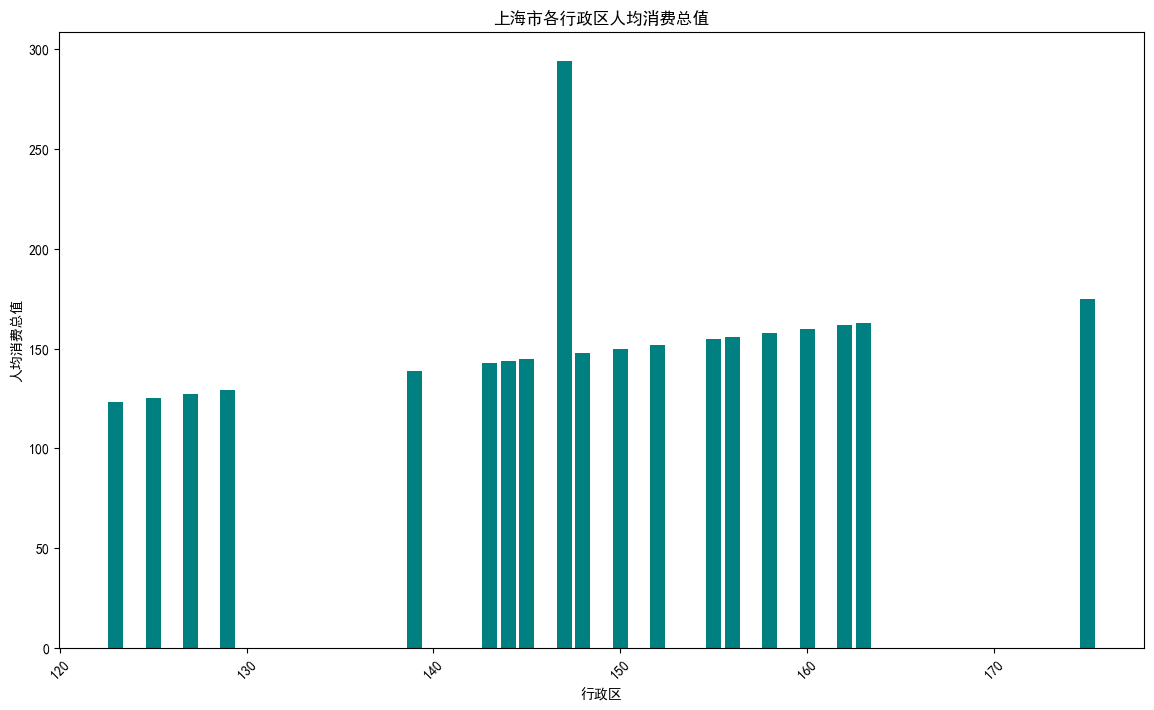

In [115]:
# 假设数据框中有一个列 '行政区' 和 '人均消费'
# 分组计算每个行政区的人均消费总值
district_avg_spending = df.groupby('行政区')['人均消费'].sum().reset_index()

# 按人均消费总值降序排序
district_avg_spending = district_avg_spending.sort_values(by='人均消费', ascending=False)

# 绘制条形图
plt.figure(figsize=(14, 8))
plt.bar(district_avg_spending['行政区'], district_avg_spending['人均消费'], color='teal')
plt.title('上海市各行政区人均消费总值')
plt.xlabel('行政区')
plt.ylabel('人均消费总值')
plt.xticks(rotation=45)
plt.show()


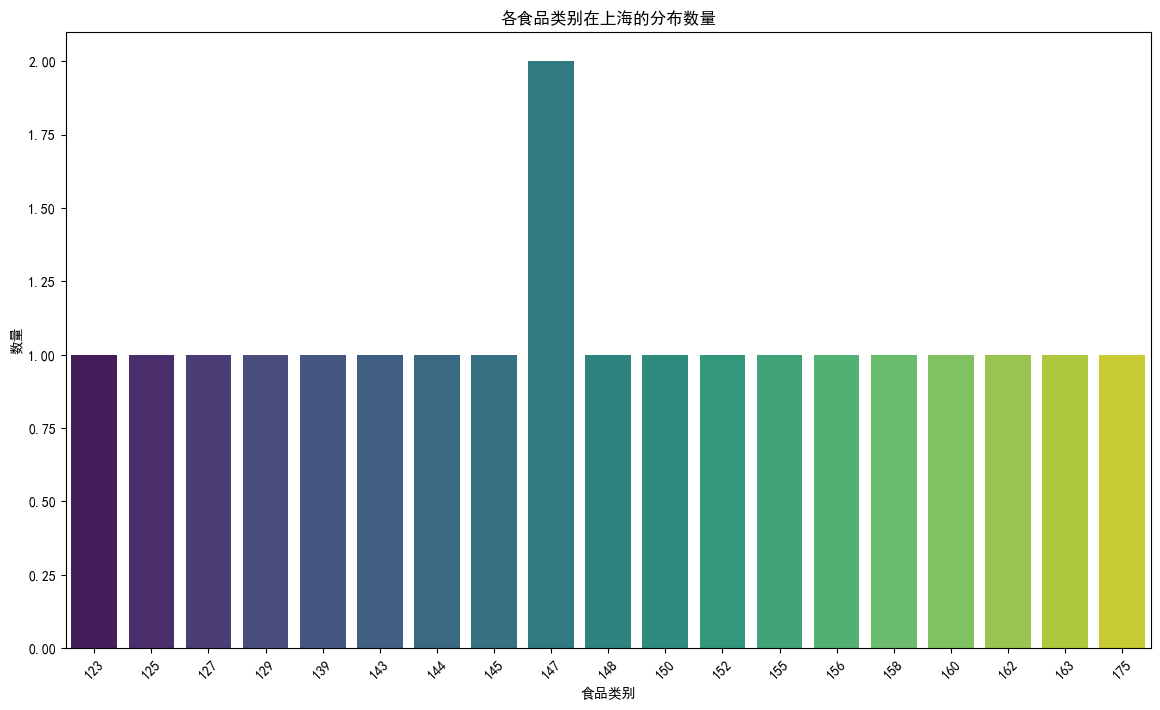

In [116]:
# 假设数据框中有一个列 '食品类别'
plt.figure(figsize=(14, 8))
sns.countplot(x='食品类别', data=df, palette='viridis')
plt.title('各食品类别在上海的分布数量')
plt.xlabel('食品类别')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.show()
